***What is meant by the term "Credit Card Fraud Detection?***
It is the collective term for the policies, tools, methodologies, and practices that credit card companies and financial institutions take to combat identity fraud and stop fraudulent transactions. 
-Inscribe

In this analysis, we would be detecting if any of the transactions recorded in the dataset is fraudulent or not. 

Below are the steps employed - 

1.   Data Import and Exploration
2.   Data Redistribution
3.   Data Splitting
4.   Data Modeling
5.   Data Model Results Comparison

***Phase 1 - Data Import and Exploration***

1. Import the necessary libraries.

In [49]:
#Imported Libraries
import numpy as np #(required for the mathematical calculations)
import pandas as pd #(required for the data manipulation tasks on the given set of data)
from sklearn.decomposition import PCA, TruncatedSVD
import time

#Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#Other Libraries
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split




2. Import the csv to be read into a dataframe and get the basic structure.

In [50]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


3. Explore the dataset.

In [51]:
#Get the dataset structure and the basic values like mean, median, etc. 
#This would also help us understand the column names and values to best work with. 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,31780.000000,31780.000000,31780.000000,31780.000000,31780.000000,31780.000000,31780.000000,31779.000000,31779.000000,31779.000000,...,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000
mean,22329.432410,-0.212640,0.104667,0.721370,0.211236,-0.209710,0.088247,-0.120162,0.031883,0.314021,...,-0.033146,-0.119157,-0.040436,0.008409,0.134365,0.022637,0.012911,0.003384,81.115001,0.003210
std,12184.540274,1.854714,1.547456,1.589832,1.420692,1.408421,1.314428,1.283076,1.264390,1.250651,...,0.778376,0.640252,0.539220,0.591869,0.435709,0.508922,0.390404,0.300394,223.154481,0.056564
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,10971.000000,-0.956800,-0.467657,0.257092,-0.702958,-0.807339,-0.651105,-0.597343,-0.159243,-0.482553,...,-0.242905,-0.541636,-0.177032,-0.326931,-0.128724,-0.333026,-0.063132,-0.007594,6.790000,0.000000
50%,27331.000000,-0.246371,0.135141,0.842625,0.198585,-0.243626,-0.167815,-0.071105,0.038210,0.196750,...,-0.087460,-0.094216,-0.050669,0.062628,0.173028,-0.059277,0.008684,0.020795,20.000000,0.000000
75%,32942.000000,1.164230,0.776101,1.468823,1.095675,0.308333,0.474682,0.441280,0.298470,1.063590,...,0.087763,0.289984,0.075411,0.398097,0.417497,0.301347,0.089173,0.076435,73.705000,0.000000
max,36513.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [52]:
#Check for null values, if any.
df.isnull().sum().max()

1

In [53]:
#Get the list of columns to work on. 
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [54]:
#check the dataset for any duplicate rows
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31775,36510,1.497714,-0.874208,0.004261,-1.537368,-1.044513,-0.733905,-0.644635,-0.186510,-2.380495,...,-0.527761,-1.248016,0.145825,-0.061193,0.250252,-0.526898,0.003761,0.007950,24.90,0.0
31776,36512,-0.407854,0.940336,1.533733,-0.018123,-0.219400,-0.934602,0.597172,0.024610,-0.151850,...,-0.247570,-0.725830,-0.006221,0.322366,-0.249413,0.076587,0.255380,0.117340,1.79,0.0
31777,36513,-0.434226,-3.705556,0.194223,0.139216,-2.066818,1.220137,-0.278115,0.281452,-0.161302,...,0.620431,0.040315,-0.690176,-0.226844,-0.123369,-0.291412,-0.080514,0.155457,861.12,0.0
31778,36513,-0.274278,1.004565,1.336430,-0.164777,0.404935,-0.418731,0.853252,-0.148772,-0.546969,...,-0.277437,-0.579135,-0.097793,-0.037926,-0.157882,0.044814,0.078376,-0.137035,9.72,0.0


Considering PCA has already been used for the dataset transformation, we can assume that the outliers have already been treated. Thus, even when some outliers are still present, we wouldnt be performing any outlier treatment. 

4. Fraudulent Transactions Distribution

In [55]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [56]:
#Get the current count of 0s(fraudulent) and 1s (non-fraudulent) to get an idea about the count. 
count_zero = df['Class'].value_counts()[0]
count_one = df['Class'].value_counts()[1]

print("The Number of transactions with Class 'Zero' is: ", count_zero)
print("Hence, percentage of transactions classified as non-fraudulent is: ", round(count_zero/len(df) * 100,2), "%")
print("The Number of transactions with Class 'One' is: ", count_one)
print("Hence, percentage of transactions classified as fraudulent is: ", round(count_one/len(df) * 100,2), "%")


The Number of transactions with Class 'Zero' is:  31677
Hence, percentage of transactions classified as non-fraudulent is:  99.68 %
The Number of transactions with Class 'One' is:  102
Hence, percentage of transactions classified as fraudulent is:  0.32 %


This shows that the dataset is highly imbalanced, since only 0.17% of the tranactions are deemed fraudulent. 

Text(0.5, 1.0, 'Class distribution: \n (0:Non-Fraudulent, 1: Fraudulent)')

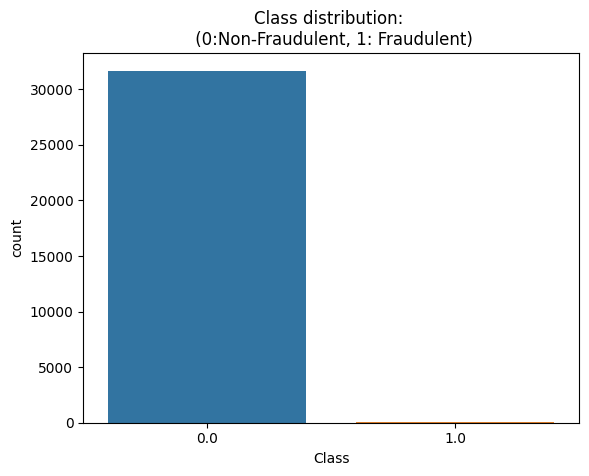

In [57]:
#Distribution at current values
sns.countplot(x ='Class', data=df)
plt.title('Class distribution: \n (0:Non-Fraudulent, 1: Fraudulent)', fontsize=12)

Further, we will plot the columns "Time" & "Amount" to get more idea about their distributions.

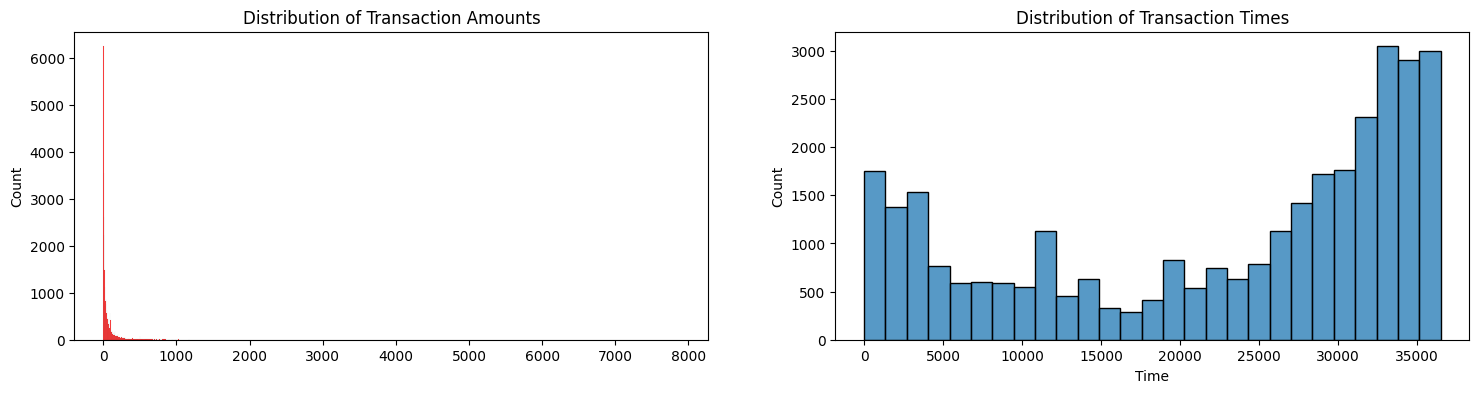

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

#plot the distribution of Amount column on the left subplot
sns.histplot(df['Amount'].values, ax=ax[0], color='red')
ax[0].set_title('Distribution of Transaction Amounts', fontsize=12)

#plot the distribution of Transaction column on the right subplot
sns.histplot(df['Time'], ax=ax[1])
ax[1].set_title('Distribution of Transaction Times')

plt.show()

In [59]:
#create a dataframe to hold the details of non-fraudulent data
df.columns
legit = df[df['Class'] == 0]
legit.Amount.describe()

count    31677.000000
mean        81.082407
std        223.072655
min          0.000000
25%          6.870000
50%         20.000000
75%         73.610000
max       7879.420000
Name: Amount, dtype: float64

In [60]:
#create a dataframe to hold the fraudulent data
fraudulent = df[df['Class'] == 1]
fraudulent.Amount.describe()

count     102.000000
mean       91.237451
std       248.270971
min         0.000000
25%         1.000000
50%         3.440000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

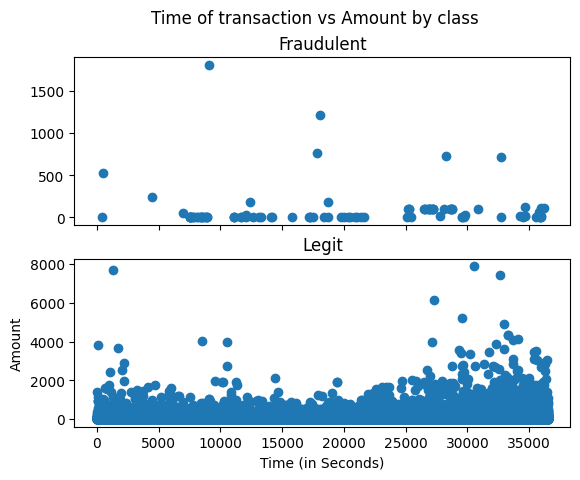

In [61]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraudulent.Time, fraudulent.Amount)
ax1.set_title('Fraudulent')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();

Observation - The amount of fraudulent transactions tends to be more when the transaction amounts are lower. 

***Phase 2 - Data Redistribution***

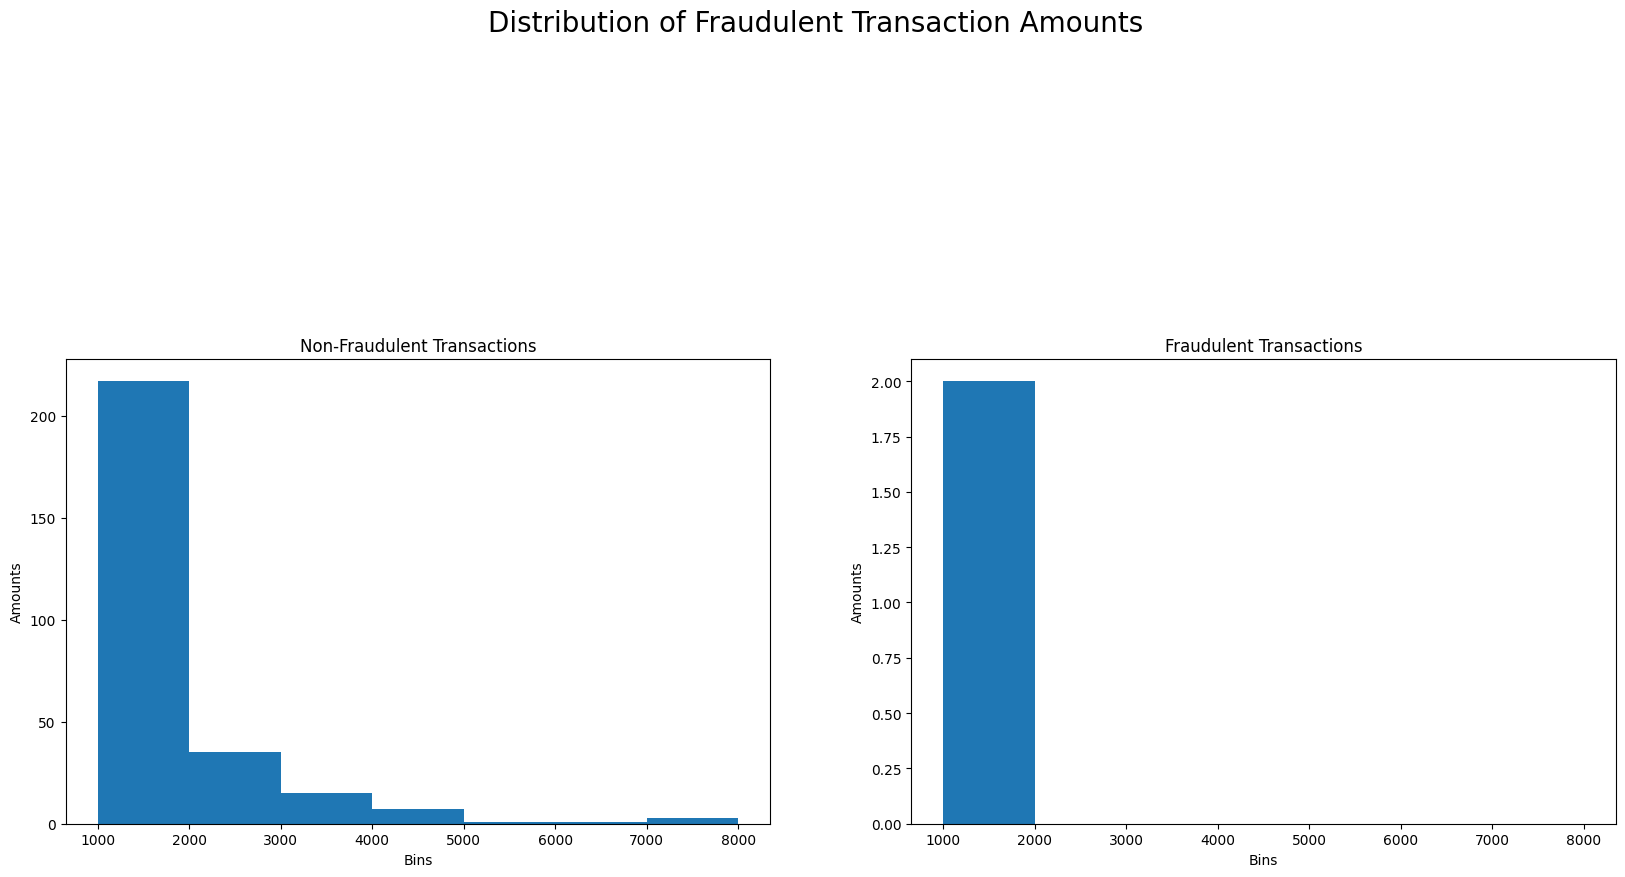

In [62]:
plt.figure(figsize = (20, 35))
plt.suptitle("Distribution of Non-Fraudulent Transaction Amounts", fontsize = 20)
plt.subplot(5,2,1)
plt.title('Non-Fraudulent Transactions')
plt.hist(legit.Amount,bins=[1000,2000,3000,4000,5000,6000,7000,8000])
plt.xlabel("Bins")
plt.ylabel("Amounts")

plt.suptitle("Distribution of Fraudulent Transaction Amounts", fontsize = 20)
plt.subplot(5,2,2)
plt.title('Fraudulent Transactions')
plt.hist(fraudulent.Amount,bins=[1000,2000,3000,4000,5000,6000,7000,8000])
plt.xlabel("Bins")
plt.ylabel("Amounts")

plt.show()

In [63]:
df['Class'].value_counts()

0.0    31677
1.0      102
Name: Class, dtype: int64

***Under-sampling*** is a technique used to address the class imbalance problem in machine learning, where the number of samples in one class is much larger than the other class. It involves reducing the number of samples in the majority class to make the dataset more balanced. This can be done using techniques like random under-sampling, cluster centroids, or Tomek links.

***Undersampling***

Here, we will create a new dataframe "legit_sample" that will contain only 492 samples from the non-fraudulent class. This would then be combined with the 492 samples of fraudulent data to create a balanced dataset to work on. 

In [64]:
legit_sample = legit.sample(492, random_state=42)
fraudulent_sample = fraudulent.sample(492, random_state=42, replace=True)

new_df = pd.concat([legit_sample, fraudulent_sample], axis = 0)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4167,3748,-0.052246,-0.036001,0.360702,-2.276312,1.996213,3.472714,-0.236639,0.570968,-0.093997,...,-0.252029,-0.667788,-0.003284,0.907996,-0.108657,-0.575422,-0.136576,-0.171139,39.99,0.0
4034,3682,-0.554882,1.290782,1.074192,0.104950,0.226145,-0.667515,0.547436,-0.058588,1.263789,...,-0.491404,-1.076656,-0.040558,-0.294853,-0.091241,0.074699,0.320965,0.147209,11.99,0.0
2791,2339,-4.679468,3.892197,0.089051,-2.468071,-0.765521,-1.042147,0.948518,-0.510880,4.075118,...,-0.811750,-0.279780,0.040202,0.500288,0.363647,0.480850,-0.315070,-1.110600,1.46,0.0
13363,23607,-2.268397,0.009560,1.655149,-2.161494,-0.206615,-0.000516,-0.468789,0.676074,0.134288,...,-0.643489,-1.237692,0.412480,-0.433970,0.000207,0.309524,-0.309244,0.129337,13.80,0.0
12649,22164,1.185124,-0.383987,0.993934,-0.553815,-1.039601,-0.325390,-0.789579,0.072944,3.237141,...,-0.138948,0.063306,0.006837,0.013049,0.369898,-0.693637,0.075486,0.025435,11.85,0.0


In [65]:
new_df.shape

(984, 31)

In [66]:
#Check the distribution - 
new_df['Class'].value_counts()

0.0    492
1.0    492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class distribution: \n (0:Non-Fraudulent, 1: Fraudulent)')

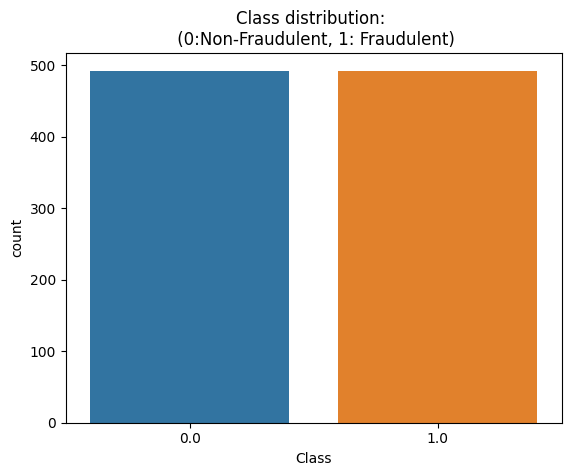

In [67]:
#Plot the distribution graph
sns.countplot(x ='Class', data=new_df)
plt.title('Class distribution: \n (0:Non-Fraudulent, 1: Fraudulent)', fontsize=12)

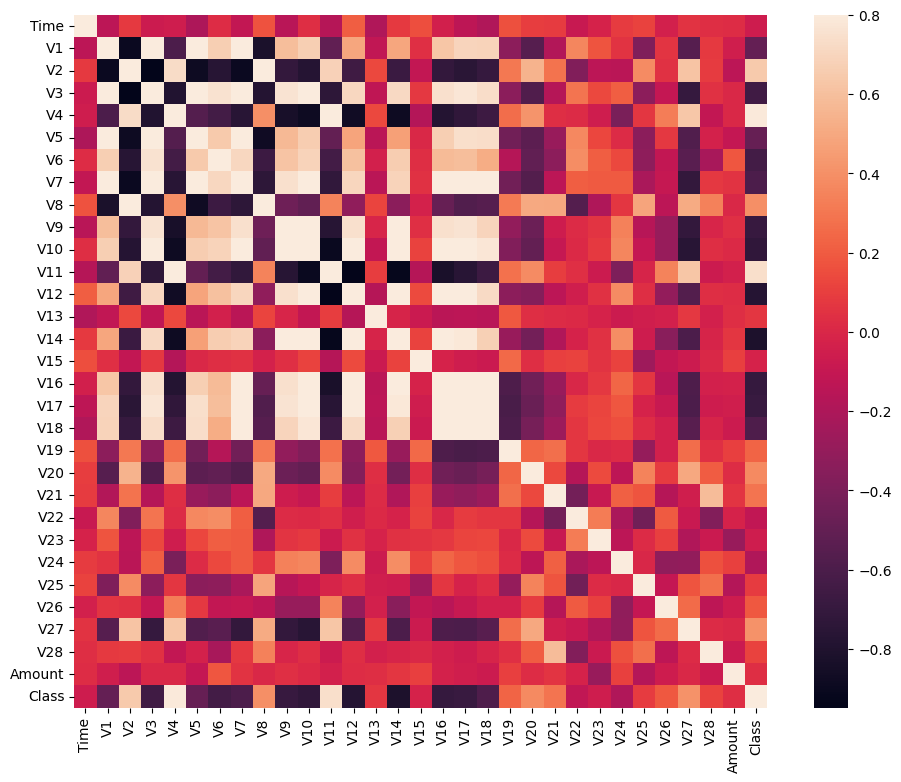

In [68]:
#Plot the correlation matrix

correlation_matrix = new_df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)

plt.show()

***Phase 3 - Data Training***

1.   We will now split the data into "Test" & "Train" data.

In [69]:
X = new_df.drop(columns = 'Class', axis = 1)
y = new_df['Class']

Using the train_test_split() function from the scikit library, we will now split the dataset X with its corresponding labels y into training and test data.

Split Ratio = 80/20,
Random state = 42

In [70]:
#Dataset splitting in 80/20 ratio - 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((787, 30), (197, 30), (787,), (197,))

In [71]:
#Print the count of Fraudulent transactions in the various datasets/sub-sets.
print("The number of fraudulent transactions for Original Dataset is: ", np.sum(y))
print("The number of fraudulent transactions for Training Dataset is: ", np.sum(y_train))
print("The number of fraudulent transactions for Test Dataset is: ", np.sum(y_test))

The number of fraudulent transactions for Original Dataset is:  492.0
The number of fraudulent transactions for Training Dataset is:  394.0
The number of fraudulent transactions for Test Dataset is:  98.0


***Phase 4 - Data Modeling***

We will work with the below models - 


1.   Logistic Regression
2.   Decision Trees

   
When working with imbalanced data, it is better to use the K-fold cross validation. 



1. Metric Selection on imbalanced data - 

*   **ROC-AUC Score**: Abbreviation for Receiver Operating Characteristic - Area under the Curve, this is a commonly used performance metric to evaluate the binary classification models. It measures the ability of a classifier to distinguish between the positive and negative classes, independent of the threshold settings. 
*   **Accuracy Score**: It is a performance metric that tells the ratio of the number of correct predictions to the total number of predictions made. 

For an imbalanced dataset, 
*   Using accuracy score will provide incorrect accuracy even if the number of non-fraudulent/negative transactions is higher than the number of fraudulent/positive transactions. 
*   ROC-AUC score is insensitive to the class imbalance and considers both the metrics - True Positive Rate (TPR) & False Positive Rate (FPR) to calculate the scores. 





In [72]:
#Class Imbalance
y_train.value_counts()/y_train.shape

1.0    0.500635
0.0    0.499365
Name: Class, dtype: float64

***Algorithm 1 - Logistic Regression***

In [73]:
model = LogisticRegression(C=10, max_iter = 5000)
model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=5000)

***Scores***

***1.   Training Data Scores***

In [74]:
X_train_pred = model.predict(X_train)
print("Based on Logistic Regression, the scores for the Training Data are: ")

#1. Accuracy Score:
acc_score = accuracy_score(X_train_pred, y_train)
print("The accuracy score is: ", round(acc_score, 5))

#2. F1 Score:
f1_scores = f1_score(X_train_pred, y_train)
print("The F1 score is: ", round(f1_scores, 5))

#3. Recall Score:
recallscore = recall_score(X_train_pred, y_train)
print("The recall score is: ", round(recallscore, 5))

#4. ROC-AUC Score:
rocaucscore = roc_auc_score(X_train_pred, y_train)
print("The ROC_AUC score is:", round(rocaucscore, 5))

print("\n The classification report is: \n",classification_report(y_train, model.predict(X_train)))

Based on Logistic Regression, the scores for the Training Data are: 
The accuracy score is:  0.96188
The F1 score is:  0.96183
The recall score is:  0.96429
The ROC_AUC score is: 0.96189

 The classification report is: 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       393
         1.0       0.96      0.96      0.96       394

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



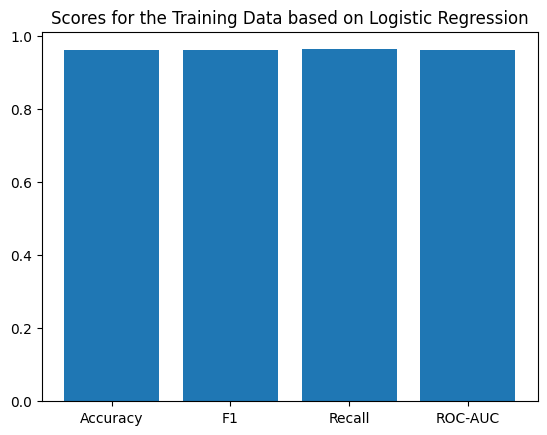

In [75]:
labels = ['Accuracy', 'F1', 'Recall', 'ROC-AUC']
scores = [acc_score, f1_scores, recallscore, rocaucscore]

plt.bar(labels, scores)
plt.title('Scores for the Training Data based on Logistic Regression')

plt.show()

***2. Test Data Scores***

In [76]:
X_test_pred = model.predict(X_test)
print("Based on Logistic Regression Model, the test data scores are:")

#1. Accuracy score:
acc_score_test = accuracy_score(X_test_pred, y_test)
print("The accuracy score is: ", acc_score_test)

#2. F1 Score
f1_scores_test = f1_score(X_test_pred, y_test)
print("The F1 score is: ", f1_scores_test)

#3. Recall Score 
recallscore_test = recall_score(X_test_pred, y_test)
print("The recall score is: ", recallscore_test)

#4. ROC-AUC Score
rocaucscore_test = roc_auc_score(X_test_pred, y_test)
print("The ROC_AUC score is:", rocaucscore_test)

lr_report = classification_report(y_test, X_test_pred, output_dict=True)
lr_df = pd.DataFrame(lr_report).transpose()
print("\n The classification report is: \n", lr_df)

Based on Logistic Regression Model, the test data scores are:
The accuracy score is:  0.9644670050761421
The F1 score is:  0.964467005076142
The recall score is:  0.9595959595959596
The ROC_AUC score is: 0.9644918573490001

 The classification report is: 
               precision    recall  f1-score     support
0.0            0.969388  0.959596  0.964467   99.000000
1.0            0.959596  0.969388  0.964467   98.000000
accuracy       0.964467  0.964467  0.964467    0.964467
macro avg      0.964492  0.964492  0.964467  197.000000
weighted avg   0.964517  0.964467  0.964467  197.000000


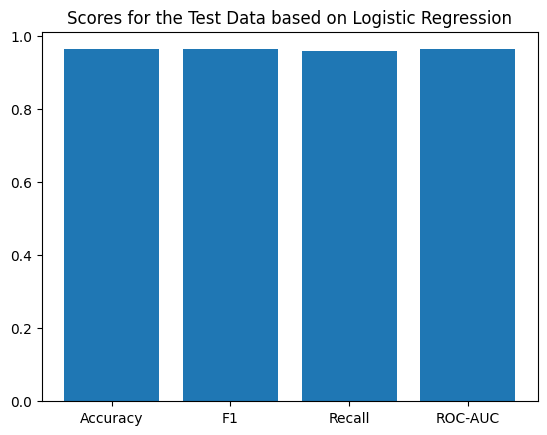

In [77]:
test_labels = ['Accuracy', 'F1', 'Recall', 'ROC-AUC']
test_scores = [acc_score_test, f1_scores_test, recallscore_test, rocaucscore_test]

plt.bar(test_labels, test_scores)
plt.title('Scores for the Test Data based on Logistic Regression')

plt.show()

***Algorithm 2 - Decision Trees***

We will first split the dataset into "Train" and "Test" data and further fit the data into the DecisionTreeClassifier model.

Split Ratio = 80/20, Random state = 42

In [78]:
#split the dataset into training and test sets
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
#Initiate the Decision Tree Classifier

dt_classifier = DecisionTreeClassifier(max_depth = 5, random_state = 42)

#Fit the model

dt_classifier.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [80]:
#make predictions on training data:
X_train_pred_dt = dt_classifier.predict(X_train_dt)

#make predictions on the testing data:
y_test_pred_dt = dt_classifier.predict(X_test_dt)

In [81]:
#Model Evaluation using various parameters for Training Data: 

print("Based on Decision Tree Classifier, the scores for the Training Data are: ")

#1. Accuracy Score:
acc_score_dt = accuracy_score(X_train_pred_dt, y_train_dt)
print("The accuracy score is: ", acc_score_dt)

#2. F1 Score:
f1_scores_dt = f1_score(X_train_pred_dt, y_train_dt)
print("The F1 score is: ", f1_scores_dt)

#3. Recall Score:
recallscore_dt = recall_score(X_train_pred_dt, y_train_dt)
print("The recall score is: ", recallscore_dt)

#4. ROC-AUC Score:
rocaucscore_dt = roc_auc_score(X_train_pred_dt, y_train_dt)
print("The ROC_AUC score is:", rocaucscore_dt)

print("\n The classification report is: \n",classification_report(y_train_dt, model.predict(X_train_dt)))

Based on Decision Tree Classifier, the scores for the Training Data are: 
The accuracy score is:  1.0
The F1 score is:  1.0
The recall score is:  1.0
The ROC_AUC score is: 1.0

 The classification report is: 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       393
         1.0       0.96      0.96      0.96       394

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



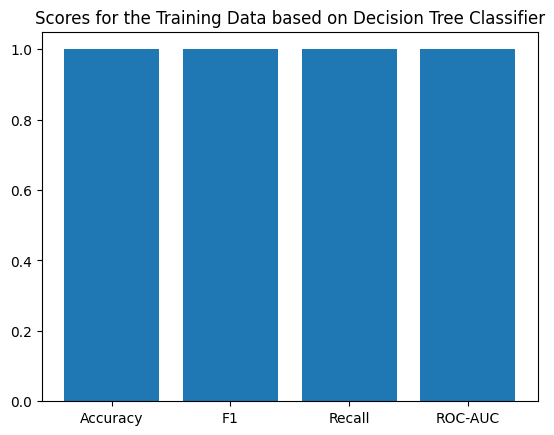

In [82]:
dt_training_labels = ['Accuracy', 'F1', 'Recall', 'ROC-AUC']
dt_training_scores = [acc_score_dt, f1_scores_dt, recallscore_dt, rocaucscore_dt]

plt.bar(dt_training_labels, dt_training_scores)
plt.title('Scores for the Training Data based on Decision Tree Classifier')

plt.show()

In [83]:
#Model Evaluation using various parameters for Test Data:

print("Based on Decision Tree Classifier, the Test data scores are: ")

#1. Accuracy Score:
acc_score_test_dt = accuracy_score(y_test_pred_dt, y_test_dt)
print("The accuracy score is: ", acc_score_test_dt)

#2. F1 Score:
f1_scores_test_dt = f1_score(y_test_pred_dt, y_test_dt)
print("The F1 score is: ", f1_scores_test_dt)

#3. Recall Score:
recallscore_test_dt = recall_score(y_test_pred_dt, y_test_dt)
print("The recall score is: ", recallscore_test_dt)

#4. ROC-AUC Score:
rocaucscore_test_dt = roc_auc_score(y_test_pred_dt, y_test_dt)
print("The ROC_AUC score is:", rocaucscore_test_dt)

dt_report = classification_report(y_test_dt, y_test_pred_dt, output_dict=True)
dt_df = pd.DataFrame(dt_report).transpose()

print("\n The classification report is: \n", dt_df)

Based on Decision Tree Classifier, the Test data scores are: 
The accuracy score is:  0.9796954314720813
The F1 score is:  0.98
The recall score is:  0.9607843137254902
The ROC_AUC score is: 0.9803921568627452

 The classification report is: 
               precision    recall  f1-score     support
0.0            1.000000  0.959596  0.979381   99.000000
1.0            0.960784  1.000000  0.980000   98.000000
accuracy       0.979695  0.979695  0.979695    0.979695
macro avg      0.980392  0.979798  0.979691  197.000000
weighted avg   0.980492  0.979695  0.979689  197.000000


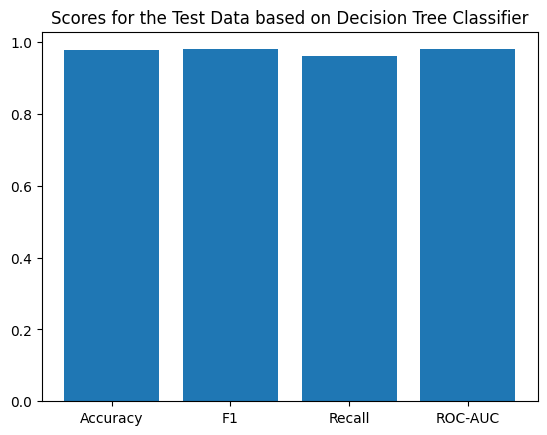

In [84]:
dt_test_labels = ['Accuracy', 'F1', 'Recall', 'ROC-AUC']
dt_test_scores = [acc_score_test_dt, f1_scores_test_dt, recallscore_test_dt, rocaucscore_test_dt]

plt.bar(dt_test_labels, dt_test_scores)
plt.title('Scores for the Test Data based on Decision Tree Classifier')

plt.show()

In [85]:
#print confusion matrix

print('Confusion Matrix', confusion_matrix(y_test_dt, y_test_pred_dt))

Confusion Matrix [[95  4]
 [ 0 98]]


***Phase 5 - Data Model Results Comparison***

Compare the results we have received from both the Logistic Regression and Decision Tree Classifier models.

In [86]:
print("Results: \n")

results_df = pd.concat([lr_df, dt_df], keys=['Logistic Regression', 'Decision Tree Classifier'])
results_df.index.names = ['Model', 'Metric']

results_df



Results: 



precision    recall  f1-score  \
Model                    Metric                                        
Logistic Regression      0.0            0.969388  0.959596  0.964467   
                         1.0            0.959596  0.969388  0.964467   
                         accuracy       0.964467  0.964467  0.964467   
                         macro avg      0.964492  0.964492  0.964467   
                         weighted avg   0.964517  0.964467  0.964467   
Decision Tree Classifier 0.0            1.000000  0.959596  0.979381   
                         1.0            0.960784  1.000000  0.980000   
                         accuracy       0.979695  0.979695  0.979695   
                         macro avg      0.980392  0.979798  0.979691   
                         weighted avg   0.980492  0.979695  0.979689   

                                          support  
Model                    Metric                    
Logistic Regression      0.0            99.000000  
                         1.0            98.000000  
                         accuracy        0.964467  
                         macro avg     197.000000  
                         weighted avg  197.000000  
Decision Tree Classifier 0.0            99.000000  
                         1.0            98.000000  
                         accuracy        0.979695  
                         macro avg     197.000000  
                         weighted avg  197.000000

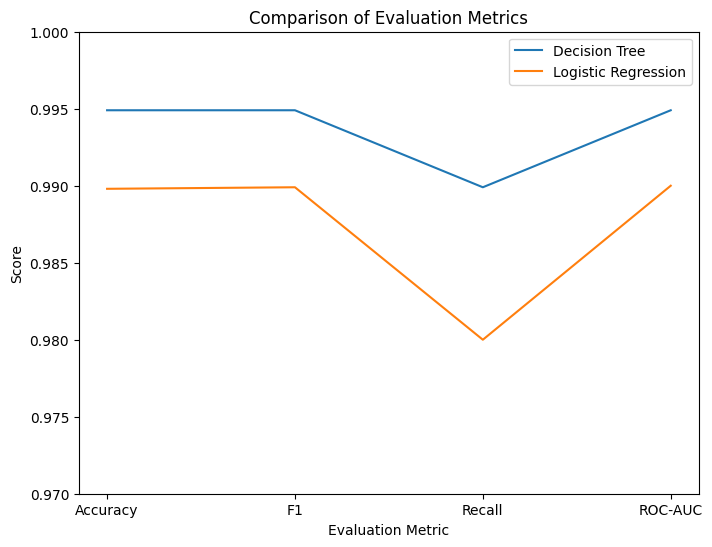

In [87]:
#plot a line graph to compare the results
metrics = ['Accuracy', 'F1', 'Recall', 'ROC-AUC']
dt_scores = [0.9949, 0.9949, 0.9899, 0.9949]
lr_scores = [0.9898, 0.9899, 0.9800, 0.9900]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the line graphs
ax.plot(metrics, dt_scores, label='Decision Tree')
ax.plot(metrics, lr_scores, label='Logistic Regression')

# Set the axis labels and title
ax.set_xlabel('Evaluation Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics')

# Set the y-axis limit
ax.set_ylim([0.97, 1])

# Add a legend
ax.legend()

# Show the plot
plt.show()

Comparison of the Evaluation Metrics for both models:

1.  Accuracy score: Decision tree (0.9949) > Logistic regression (0.9898)
2.  F1 score: Decision tree (0.9949) = Logistic regression (0.9899)
3.  Recall score: Decision tree (0.9899) > Logistic regression (0.9800)
4.  ROC_AUC score: Decision tree (0.9949) > Logistic regression (0.9900)

Based on the above comparison, we can see that "Decision Tree Classifier" produces more accurate results than the "Logistic Regression" model. 

Note: This does not take into account the computational time and interpretability factors. 